# Práctica 1.3: primera exploración a los datos



In [1]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

###### Exportamos la base con los datos para empezar la exploración de los datos.

In [2]:
path = 'diamonds.csv'
df = pd.read_csv(path,encoding='latin', error_bad_lines=False)
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### General Stats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Shape of dataframe

In [4]:
df.shape

(53940, 10)

#### Number of rows

In [5]:
df.shape[0]

53940

#### Number of columns

In [6]:
df.shape[1]

10

#### Column Names

In [7]:
df.columns.values.tolist()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Column Data Types

In [8]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Are there missing values?

In [9]:
df.isnull().any().any()

False

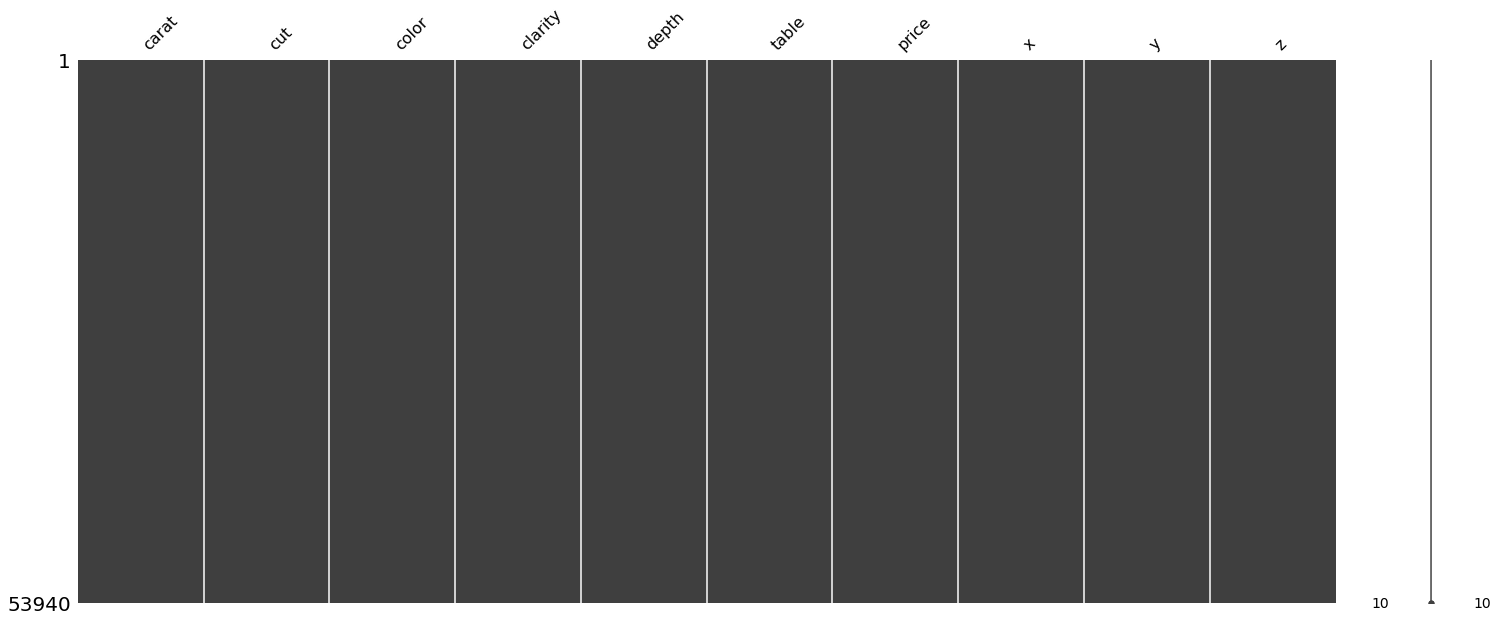

In [10]:
msno.matrix(df)

En la prueba y tabla aterior nos muestra que nuestros datos no contiene datos nulos, vamos a verificarlo

In [11]:
df.replace({' ': np.nan}, inplace=True)

In [12]:
df.isnull().any().any()

False

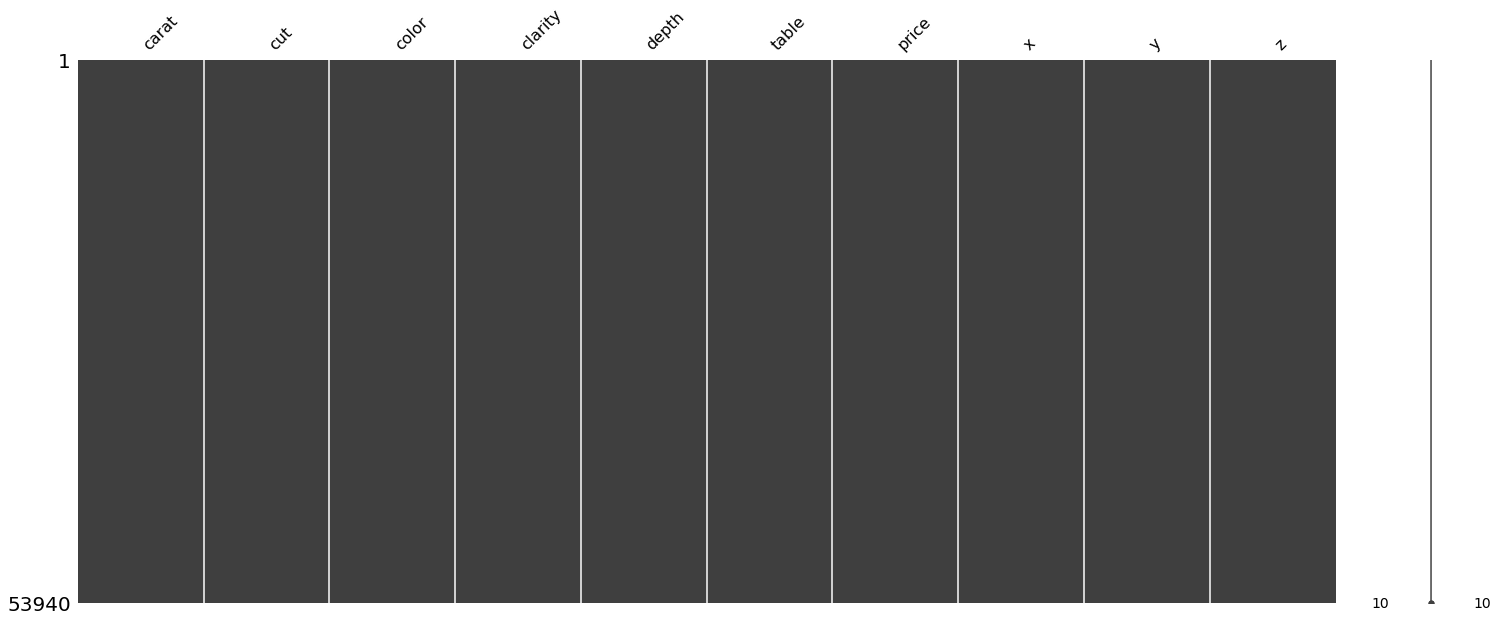

In [13]:
msno.matrix(df)

###### Efectivamente comprobamos que nuestra data no contiene datos faltantes :D

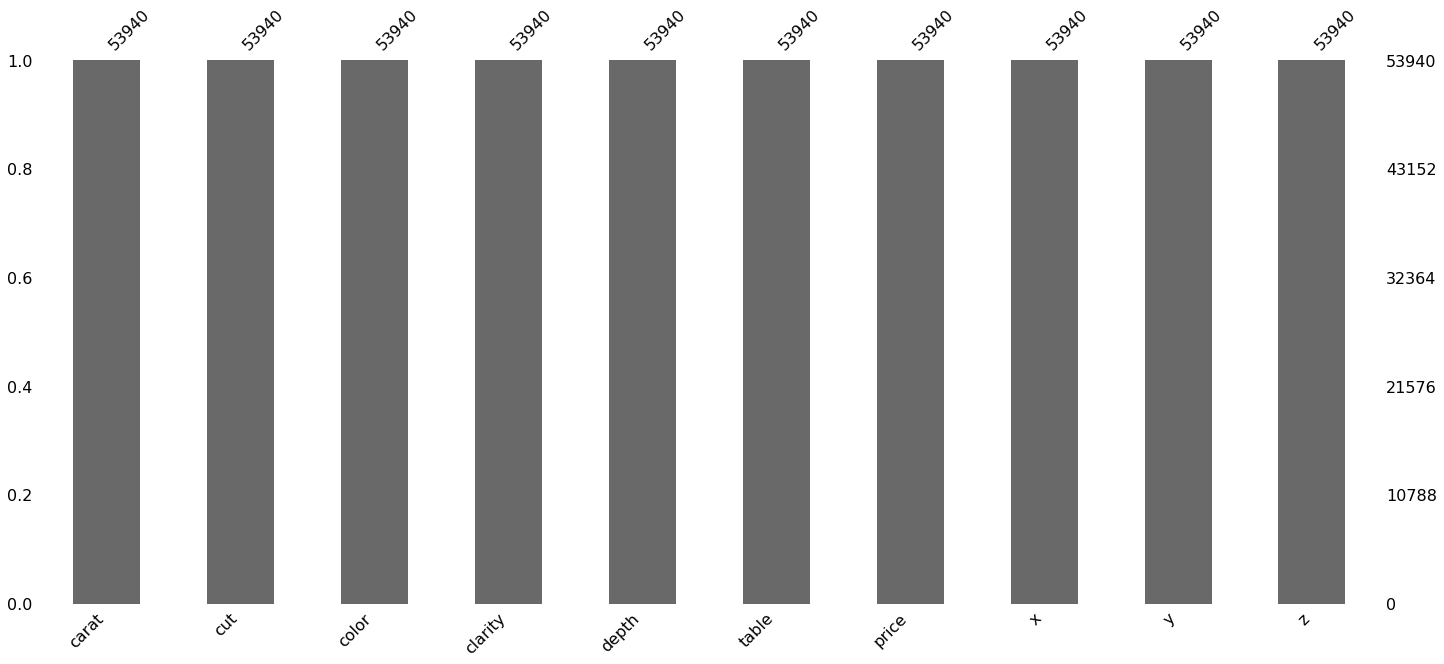

In [14]:
msno.bar(df)

Number of rows with Missing Values

#### Summary Stats

Descipciones generales de nuestras variables

In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### Selección de una o varias filas 

Select specific row index

In [16]:
df.loc[[0]]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


Select specific row indices

In [17]:
df.loc[30:33]

,carat,cut,color,clarity,depth,table,price,x,y,z
30,0.23,Very Good,F,VS1,60.0,57.0,402,4.00,4.03,2.41
31,0.23,Very Good,F,VS1,59.8,57.0,402,4.04,4.06,2.42
32,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
33,0.23,Very Good,E,VS1,59.5,58.0,402,4.01,4.06,2.40


###### Analizamos los valores que puede tomar una variable

Get values for Color

In [18]:
df.color.values

array(['E', 'E', 'E', ..., 'D', 'H', 'D'], dtype=object)

In [19]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [20]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

##### Get the number of unique values for each column

In [21]:
df.agg(['count', 'size', 'nunique'])

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
size,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
nunique,273,5,7,8,184,127,11602,554,552,375


An `agg` within a `groupby`. And`stack` at the end.

###### Agruparemos nuestros datos por claridad

In [22]:
df.groupby('clarity').agg(['count', 'size', 'nunique']).stack().sort_values(by='clarity').head(15)

carat    cut  color  depth  table  price      x      y      z
clarity                                                                       
I1      count      741    741    741    741    741    741    741    741    741
        size       741    741    741    741    741    741    741    741    741
        nunique    165      5      7    136     30    632    319    324    249
IF      count     1790   1790   1790   1790   1790   1790   1790   1790   1790
        size      1790   1790   1790   1790   1790   1790   1790   1790   1790
        nunique    115      5      7     76     25    902    327    319    208
SI1     count    13065  13065  13065  13065  13065  13065  13065  13065  13065
        size     13065  13065  13065  13065  13065  13065  13065  13065  13065
        nunique    222      5      7    137     83   5380    480    471    301
SI2     size      9194   9194   9194   9194   9194   9194   9194   9194   9194
        nunique    246      5      7    149     69   4904    492    490    320
        count     9194   9194   9194   9194   9194   9194   9194   9194   9194
VS1     count     8171   8171   8171   8171   8171   8171   8171   8171   8171
        size      8171   8171   8171   8171   8171   8171   8171   8171   8171
        nunique    191      5      7    126    105   3926    466    456    297

### Data Transform

Copy of df

In [23]:
df_copy = df.copy()
df_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df_copy.shape

(53940, 10)

### Handling Categorical Data

In [25]:
list(df['cut'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

###### Create a dictionary

Crearemos el diccionario sobre la columna de 'Genre'

In [26]:
keys = list(df['cut'].unique())
vals = range(1,6)
act = dict(zip(keys, vals))
act

{'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}

Creamos una nueva variable donde tengamos los generos como etiquetas numéricas.

In [27]:
df_copy['cut_2'] = df['cut'].map(act)
df_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


### Data Summarization
Preparing a compact representation of raw data at hand


In [28]:
df_copy.groupby(["cut","color", "clarity"]).count()

carat  depth  table  price    x    y    z  cut_2
cut       color clarity                                                  
Fair      D     I1           4      4      4      4    4    4    4      4
                IF           3      3      3      3    3    3    3      3
                SI1         58     58     58     58   58   58   58     58
                SI2         56     56     56     56   56   56   56     56
                VS1          5      5      5      5    5    5    5      5
...                        ...    ...    ...    ...  ...  ...  ...    ...
Very Good J     SI2        128    128    128    128  128  128  128    128
                VS1        120    120    120    120  120  120  120    120
                VS2        184    184    184    184  184  184  184    184
                VVS1        19     19     19     19   19   19   19     19
                VVS2        29     29     29     29   29   29   29     29

[276 rows x 8 columns]

In [29]:
df_copy.groupby(["color", "clarity"])[["cut", "depth"]].count()

cut  depth
color clarity             
D     I1         42     42
      IF         73     73
      SI1      2083   2083
      SI2      1370   1370
      VS1       705    705
      VS2      1697   1697
      VVS1      252    252
      VVS2      553    553
E     I1        102    102
      IF        158    158
      SI1      2426   2426
      SI2      1713   1713
      VS1      1281   1281
      VS2      2470   2470
      VVS1      656    656
      VVS2      991    991
F     I1        143    143
      IF        385    385
      SI1      2131   2131
      SI2      1609   1609
      VS1      1364   1364
      VS2      2201   2201
      VVS1      734    734
      VVS2      975    975
G     I1        150    150
      IF        681    681
      SI1      1976   1976
      SI2      1548   1548
      VS1      2148   2148
      VS2      2347   2347
      VVS1      999    999
      VVS2     1443   1443
H     I1        162    162
      IF        299    299
      SI1      2275   2275
      SI2      1563   1563
      VS1      1169   1169
      VS2      1643   1643
      VVS1      585    585
      VVS2      608    608
I     I1         92     92
      IF        143    143
      SI1      1424   1424
      SI2       912    912
      VS1       962    962
      VS2      1169   1169
      VVS1      355    355
      VVS2      365    365
J     I1         50     50
      IF         51     51
      SI1       750    750
      SI2       479    479
      VS1       542    542
      VS2       731    731
      VVS1       74     74
      VVS2      131    131

### Data Visualization

#### Scatter plots

Variables able to be highly correlated. To confirm or validate our hypothesis.

###### Queremos ver como se comportanel tipo de corte respecto al precio

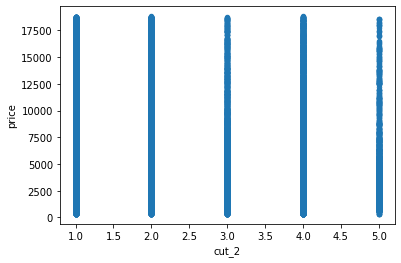

In [30]:
df_copy['cut_2'] = df_copy['cut_2'].astype('float')

df_copy.plot(kind='scatter',x='cut_2',y='price')

#### Histograms

Text(0.5, 1.0, 'Frequency of color')

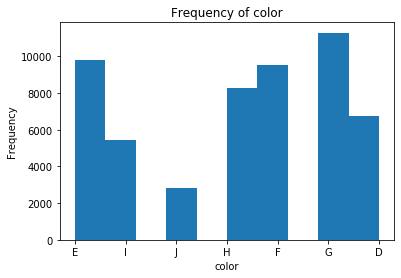

In [31]:
plt.hist(df_copy['color'])
plt.xlabel('color')
plt.ylabel('Frequency')
plt.title('Frequency of color')

Text(0.5, 1.0, 'Frequency of cut')

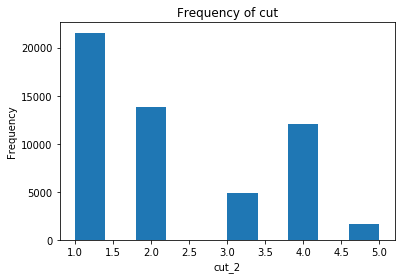

In [32]:
plt.hist(df_copy['cut_2'])
plt.xlabel('cut_2')
plt.ylabel('Frequency')
plt.title('Frequency of cut')

#### Boxplots

Text(0.5, 1.0, 'Box Plot of price count')

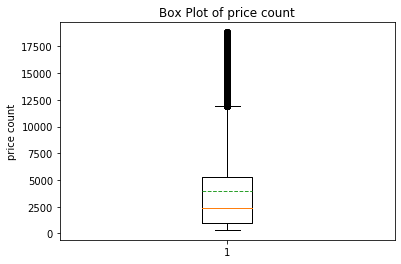

In [33]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_copy['price'], showmeans=True, meanline=True)
plt.ylabel('price count')
plt.title('Box Plot of price count')